In [1]:
#getting Working directory path!

import os
import pandas as pd
os.getcwd()

'C:\\Users\\yogesh\\OneDrive\\Desktop\\python'

In [2]:
Data=pd.read_excel('DATUM EXCEL.xlsx')

In [3]:
#There is no null values in the dataset!
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Materials                  130 non-null    object 
 1   Condition                  130 non-null    object 
 2   Temperature(c) Heating     130 non-null    int64  
 3   Temperature(c) annealed    130 non-null    int64  
 4   Temperature(c) aged        130 non-null    int64  
 5   Temperature (c) ST         130 non-null    int64  
 6   Carbon                     130 non-null    float64
 7   Hydrogen                   130 non-null    float64
 8   Iron                       130 non-null    float64
 9   Nickel                     130 non-null    float64
 10  Nitrogen                   130 non-null    float64
 11  Oxygen                     130 non-null    float64
 12  Rutherium                  130 non-null    int64  
 13  Titanium                   130 non-null    float64

In [4]:
#since this is the dataset of the material properties so outliers will be less
Data.describe()

Temperature(c) Heating  Temperature(c) annealed  Temperature(c) aged  \
count              130.000000               130.000000           130.000000   
mean                47.376923               148.923077           243.423077   
std                123.384021               321.823164           271.426061   
min                  0.000000                 0.000000             0.000000   
25%                  0.000000                 0.000000             0.000000   
50%                  0.000000                 0.000000             0.000000   
75%                  0.000000                 0.000000           540.000000   
max                540.000000              1400.000000           705.000000   

       Temperature (c) ST      Carbon    Hydrogen        Iron      Nickel  \
count          130.000000  130.000000  130.000000  130.000000  130.000000   
mean           411.769231    0.056538    0.014390    0.527692    0.036923   
std            415.325529    0.039409    0.022361    0.770006    0.173602   
min              0.000000    0.000000    0.000000    0.000000    0.000000   
25%              0.000000    0.000000    0.000000    0.200000    0.000000   
50%            365.000000    0.050000    0.015000    0.300000    0.000000   
75%            811.250000    0.100000    0.015000    0.475000    0.000000   
max           1065.000000    0.100000    0.200000    6.000000    0.900000   

         Nitrogen      Oxygen  ...     Silicon     Bismuth      Copper  \
count  130.000000  130.000000  ...  130.000000  130.000000  130.000000   
mean     0.035915    0.165123  ...    0.011154    0.002692    0.016923   
std      0.040404    0.110189  ...    0.071600    0.030697    0.123664   
min      0.000000    0.000000  ...    0.000000    0.000000    0.000000   
25%      0.000000    0.120000  ...    0.000000    0.000000    0.000000   
50%      0.030000    0.160000  ...    0.000000    0.000000    0.000000   
75%      0.050000    0.200000  ...    0.000000    0.000000    0.000000   
max      0.300000    0.500000  ...    0.700000    0.350000    1.000000   

            Boron     Yttrium      Sulfur  Elastic Modulus (GPA)  \
count  130.000000  130.000000  130.000000             130.000000   
mean     0.001154    0.000192    0.000462             105.184615   
std      0.005792    0.000965    0.002106              10.998911   
min      0.000000    0.000000    0.000000              59.000000   
25%      0.000000    0.000000    0.000000             102.700000   
50%      0.000000    0.000000    0.000000             105.000000   
75%      0.000000    0.000000    0.000000             111.575000   
max      0.030000    0.005000    0.010000             124.000000   

       Ultimate Tensile(MPA)  Yield strength(MPA) (Max)  Elongation(%)  
count             130.000000                 130.000000     130.000000  
mean              912.876923                 833.584615      15.233077  
std               401.763265                 397.341315       8.391130  
min               103.000000                  62.000000       0.000000  
25%               637.500000                 519.250000       8.000000  
50%               965.000000                 900.000000      15.000000  
75%              1200.000000                1120.000000      20.000000  
max              1700.000000                1620.000000      40.000000  

[8 rows x 31 columns]

In [5]:
Data=Data.drop(columns=['Materials'])
Data.shape

(130, 32)

In [6]:
# Dropping duplicates!

Data=Data.drop_duplicates()
Data.shape

(130, 32)

In [7]:
#Spelling mistakes occured!

Data['Condition'].value_counts()

STA         55
annealed    22
Heating     16
ST          12
pure        10
Pure         9
aged         4
annelaed     2
Name: Condition, dtype: int64

In [8]:
#Correcting the spelling mistakes!

import numpy as np
Data['Condition']=np.where(Data['Condition']=='annelaed','annealed',Data['Condition'])
Data['Condition']=np.where(Data['Condition']=='Pure','pure',Data['Condition'])

In [9]:
Data['Condition'].value_counts()

STA         55
annealed    24
pure        19
Heating     16
ST          12
aged         4
Name: Condition, dtype: int64

In [10]:
#creating dummy variables to facilitate modelling!

Data=pd.get_dummies(Data)
Data.shape

(130, 37)

<AxesSubplot:>

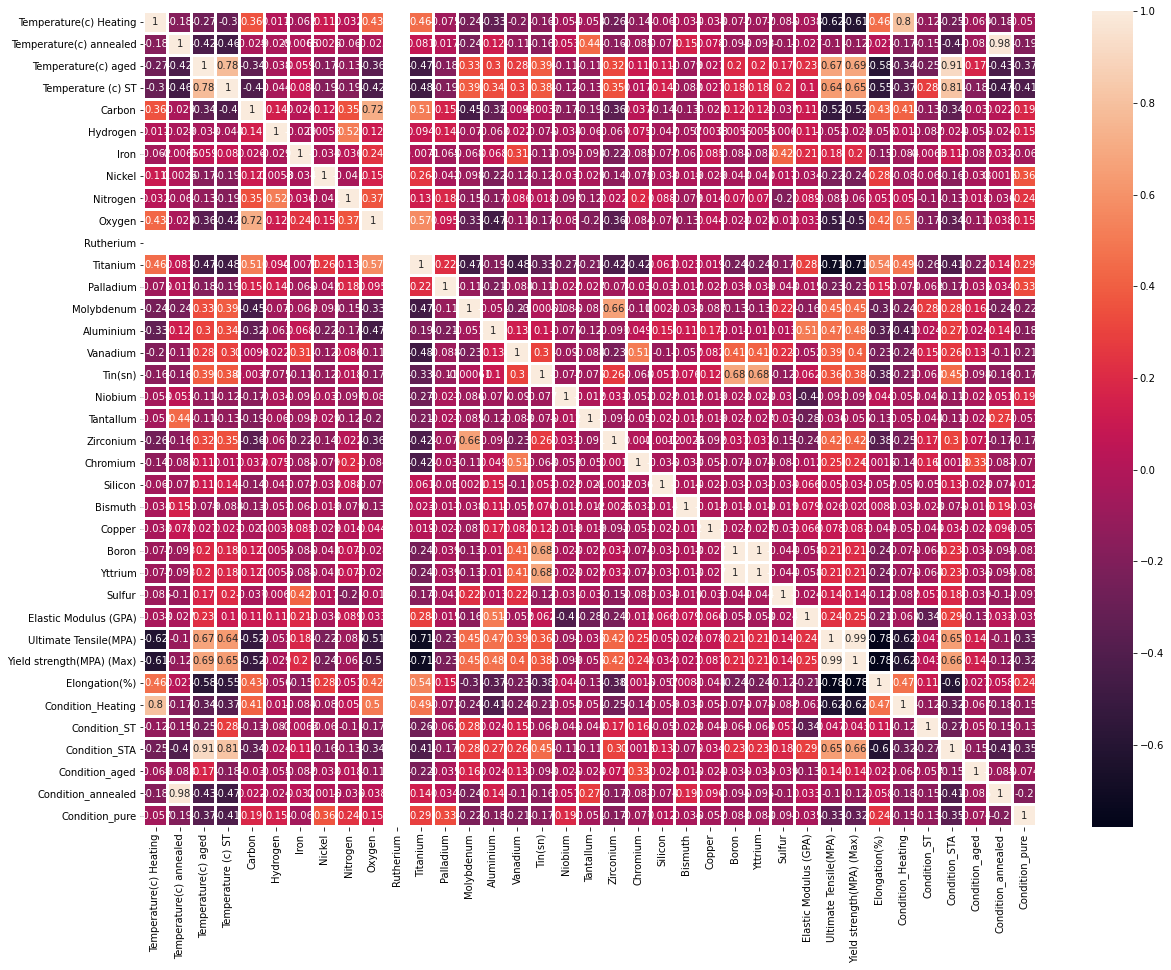

In [11]:
#correlation of variables in dataset, through this heatmap it seems there is no multicollinearity present in the dataset

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
corr=Data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,linewidths=2,annot=True)

In [12]:
#x-Input parameter and y-Output parameter!

x=Data.drop(columns=['Elastic Modulus (GPA)','Ultimate Tensile(MPA)','Yield strength(MPA) (Max)','Elongation(%)'])
y=Data['Elastic Modulus (GPA)']

In [13]:
print(x.shape)
print(y.shape)

(130, 33)
(130,)


In [14]:
#creating training and testing dataset from the main dataset!

from sklearn.model_selection import train_test_split
from sklearn import metrics
x1train,x1test,y1train,y1test=train_test_split(x,y,test_size=0.2)

In [15]:
print(x1train.shape)
print(y1train.shape)
print(x1test.shape)
print(y1test.shape)

(104, 33)
(104,)
(26, 33)
(26,)


In [16]:
#If the index is not reset, an error is displayed.

x1train=x1train.reset_index(drop=True)
y1train=y1train.reset_index(drop=True)
x1test=x1test.reset_index(drop=True)

In [17]:
#flatten which converts dataframe to ndarray!

x1train=x1train.iloc[:,:].values
x1test=x1test.iloc[:,:].values
y1train=y1train.values.flatten()

In [18]:
#As standardscalar anticipates a 2D array, transforming the 1D array to a 2D array (reshape needs to be done)!

y1train=y1train.reshape(-1,1)

In [19]:
#We need to note that the values of dependent variable are huge compared to independent variables so scaling needs to be done!

from sklearn.preprocessing import StandardScaler
StdS_X = StandardScaler()
StdS_y = StandardScaler()
x1train= StdS_X.fit_transform(x1train)
y1train= StdS_y.fit_transform(y1train)
x1test=StdS_X.fit_transform(x1test)

In [20]:
#rbf-radial basis function since the dataset is non-linear!

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x1train,y1train)

D:\Anaconda setup\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [21]:
pred_y1=regressor.predict(x1test)
print(pred_y1)

[ 0.26378763 -0.50233356 -0.15113828 -0.16381666 -0.06349474 -0.05302861
 -0.34218943 -0.16096821  0.52228481 -0.06726792 -0.10295063  0.00442966
  0.33930972 -0.16209667  0.43111914  0.24125661  0.97881226  0.44526851
 -0.10924203  0.32818054  0.34190788  0.02958366  0.19989052  0.44765729
  0.16572498 -0.66855255]


In [22]:
#converting it to an unscaled value!

pred_y1 =StdS_y.inverse_transform(pred_y1)
print(pred_y1)

[108.37206952 100.07816212 103.88014689 103.74289275 104.82896212
 104.9422668  101.81185729 103.77372964 111.17051929 104.78811426
 104.40181879 105.56430098 109.18965977 103.76151317 110.18357415
 108.12815228 116.11281362 110.33675297 104.33370913 109.06917705
 109.21778705 105.83661417 107.68032943 110.36261352 107.31045872
  98.27870152]


In [23]:
#root mean squared error!

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse1=sqrt(mean_squared_error(y1test,pred_y1))
rmse1

9.832580810702268

In [24]:
#creating a dataframe to facilitate plotting the comparison!

data1=list(zip(y1test,pred_y1))
comparison1=pd.DataFrame(data1,columns=['Actual','Predicted'])
print(comparison1)

    Actual   Predicted
0    115.0  108.372070
1     80.0  100.078162
2    113.8  103.880147
3    103.4  103.742893
4    103.0  104.828962
5    102.7  104.942267
6     75.0  101.811857
7    104.1  103.773730
8    110.0  111.170519
9    102.7  104.788114
10   105.0  104.401819
11   103.0  105.564301
12   110.0  109.189660
13   104.1  103.761513
14   120.0  110.183574
15   109.0  108.128152
16   113.8  116.112814
17    94.0  110.336753
18   102.7  104.333709
19   112.0  109.069177
20   110.0  109.217787
21   105.0  105.836614
22   110.0  107.680329
23    94.0  110.362614
24   120.0  107.310459
25    78.0   98.278702


<function matplotlib.pyplot.show(close=None, block=None)>

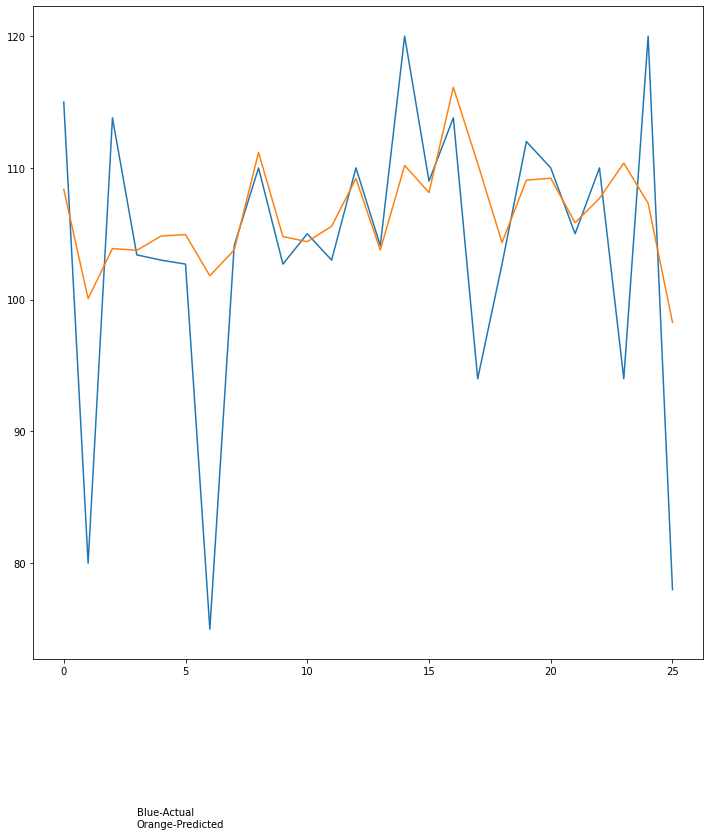

In [25]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,12))
graph1=comparison1[['Actual','Predicted']]
plt.text(3,60,'Blue-Actual \nOrange-Predicted')
plt.plot(graph1)
plt.show

In [26]:
x1=Data.drop(columns=['Elastic Modulus (GPA)','Ultimate Tensile(MPA)','Yield strength(MPA) (Max)','Elongation(%)'])
y1=Data['Ultimate Tensile(MPA)']
print(x1.shape)
print(y1.shape)

(130, 33)
(130,)


In [27]:
x2train,x2test,y2train,y2test=train_test_split(x1,y1,test_size=0.2)

In [28]:
print(x2train.shape)
print(y2train.shape)
print(x2test.shape)
print(y2test.shape)

(104, 33)
(104,)
(26, 33)
(26,)


In [29]:
x2train=x2train.reset_index(drop=True)
y2train=y2train.reset_index(drop=True)
x2test=x2test.reset_index(drop=True)

In [30]:
x2train=x2train.iloc[:,:].values
x2test=x2test.iloc[:,:].values
y2train=y2train.values.flatten()
y2train=y2train.reshape(-1,1)

In [31]:
StdS_X = StandardScaler()
StdS_y = StandardScaler()
x2train= StdS_X.fit_transform(x2train)
y2train= StdS_y.fit_transform(y2train)
x2test=StdS_X.fit_transform(x2test)

In [32]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x2train,y2train)

D:\Anaconda setup\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [33]:
pred_y2=regressor.predict(x2test)
print(pred_y2)

[-1.21905806 -0.69518865  0.06201077  0.78421023  0.67514598 -0.0769498
  0.74276021  0.7553729   0.94598551 -0.83340136  0.96775497  0.39219333
 -1.53811089  0.74311884  0.66451737  0.1874596  -1.90256376  0.83447564
  0.20069268  0.31001887  0.06879062 -0.05589815  0.40327508 -1.48262481
 -1.73012061 -1.22639494]


In [34]:
pred_y2 =StdS_y.inverse_transform(pred_y2)
print(pred_y2)

[ 448.71285936  649.60831034  939.98204979 1216.93387271 1175.10949587
  886.69291697 1201.03845983 1205.87522211 1278.97207813  596.60597027
 1287.32031309 1066.60172491  326.36125765 1201.17598838 1171.03359531
  988.08964903  186.59947125 1236.20984535  993.16432274 1035.08914917
  942.58201545  894.76588573 1070.85139658  347.63926997  252.72863136
  445.89928395]


In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse2=sqrt(mean_squared_error(y2test,pred_y2))
rmse2

226.345248845091

In [36]:
data2=list(zip(y2test,pred_y2))
comparison2=pd.DataFrame(data2,columns=['Actual','Predicted'])
print(comparison2)

    Actual    Predicted
0      240   448.712859
1      520   649.608310
2      950   939.982050
3     1185  1216.933873
4     1510  1175.109496
5     1030   886.692917
6      790  1201.038460
7      860  1205.875222
8     1700  1278.972078
9      430   596.605970
10    1560  1287.320313
11     890  1066.601725
12     325   326.361258
13    1320  1201.175988
14    1475  1171.033595
15    1110   988.089649
16     124   186.599471
17    1240  1236.209845
18    1000   993.164323
19    1170  1035.089149
20    1440   942.582015
21     900   894.765886
22     725  1070.851397
23     220   347.639270
24     165   252.728631
25     510   445.899284


<function matplotlib.pyplot.show(close=None, block=None)>

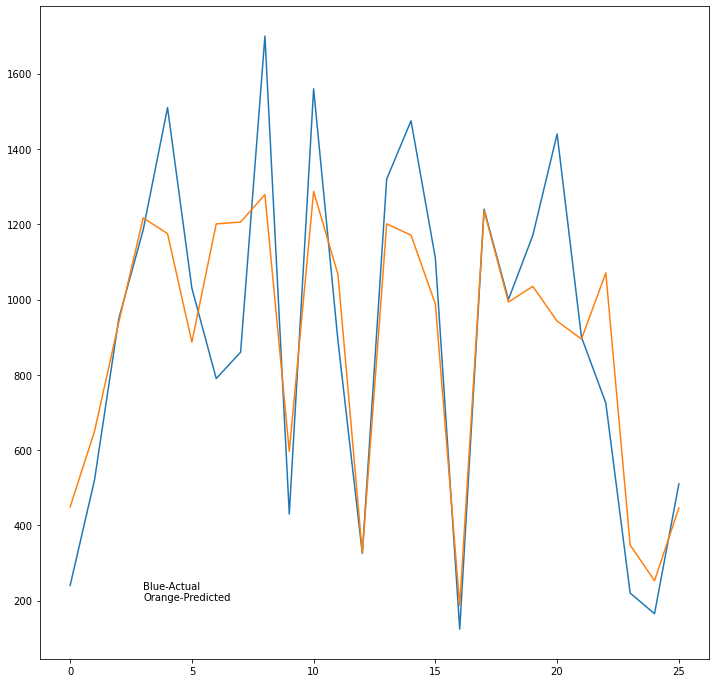

In [37]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,12))
graph2=comparison2[['Actual','Predicted']]
plt.text(3,200,'Blue-Actual \nOrange-Predicted')
plt.plot(graph2)
plt.show

In [38]:
x2=Data.drop(columns=['Elastic Modulus (GPA)','Ultimate Tensile(MPA)','Yield strength(MPA) (Max)','Elongation(%)'])
y2=Data['Yield strength(MPA) (Max)']
print(x2.shape)
print(y2.shape)

(130, 33)
(130,)


In [39]:
x3train,x3test,y3train,y3test=train_test_split(x2,y2,test_size=0.2)

In [40]:
print(x3train.shape)
print(y3train.shape)
print(x3test.shape)
print(y3test.shape)

(104, 33)
(104,)
(26, 33)
(26,)


In [41]:
x3train=x3train.reset_index(drop=True)
y3train=y3train.reset_index(drop=True)
x3test=x3test.reset_index(drop=True)

In [42]:
x3train=x3train.iloc[:,:].values
x3test=x3test.iloc[:,:].values
y3train=y3train.values.flatten()

In [43]:
y3train=y3train.reshape(-1,1)

In [44]:
StdS_X = StandardScaler()
StdS_y = StandardScaler()
x3train= StdS_X.fit_transform(x3train)
y3train= StdS_y.fit_transform(y3train)
x3test=StdS_X.fit_transform(x3test)

In [45]:
regressor = SVR(kernel = 'rbf')
regressor.fit(x3train,y3train)

D:\Anaconda setup\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [46]:
pred_y3=regressor.predict(x3test)
print(pred_y3)

[-1.05331378  0.78989606 -1.74078309 -1.50907762  0.72363221  0.15670341
 -0.126895   -1.8624598   0.4443547   0.83629909 -0.10452825 -0.88243253
 -1.36522365  0.80314957 -0.88760829 -1.86326144  0.1078396   1.0367354
 -1.21193933 -0.27324955 -0.8932756   0.97063277 -0.56665686  0.77227937
  0.87646627  1.26286935]


In [47]:
pred_y3 =StdS_y.inverse_transform(pred_y3)
print(pred_y3)

[ 470.77581225 1157.48824593  214.64994201  300.97491069 1132.80076375
  921.58386945  815.92549545  169.31766157 1028.75219802 1174.77631409
  824.25852678  534.43990373  354.56962859 1162.4260166   532.5116047
  169.01899794  903.37900719 1249.45153779  411.67774586  761.39915508
  530.40017484 1224.82411808  652.08634631 1150.92491135 1189.74113103
 1333.700757  ]


In [48]:
rmse3=sqrt(mean_squared_error(y3test,pred_y3))
rmse3

198.8744931426492

In [49]:
data3=list(zip(y3test,pred_y3))
comparison3=pd.DataFrame(data3,columns=['Actual','Predicted'])
print(comparison3)

    Actual    Predicted
0      415   470.775812
1     1070  1157.488246
2       90   214.649942
3      165   300.974911
4     1360  1132.800764
5      930   921.583869
6      800   815.925495
7       76   169.317662
8     1070  1028.752198
9     1140  1174.776314
10     830   824.258527
11     607   534.439904
12     250   354.569629
13    1410  1162.426017
14     170   532.511605
15      76   169.018998
16    1248   903.379007
17    1350  1249.451538
18     340   411.677746
19     276   761.399155
20     275   530.400175
21     870  1224.824118
22     340   652.086346
23    1200  1150.924911
24    1035  1189.741131
25    1200  1333.700757


<function matplotlib.pyplot.show(close=None, block=None)>

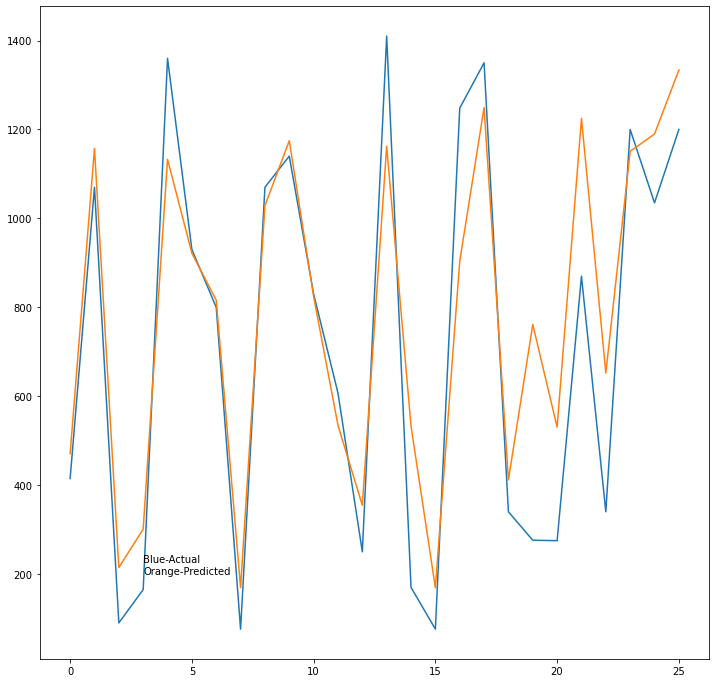

In [50]:
plt.figure(figsize=(12,12))
graph3=comparison3[['Actual','Predicted']]
plt.text(3,200,'Blue-Actual \nOrange-Predicted')
plt.plot(graph3)
plt.show

In [51]:
x3=Data.drop(columns=['Elastic Modulus (GPA)','Ultimate Tensile(MPA)','Yield strength(MPA) (Max)','Elongation(%)'])
y3=Data['Elongation(%)']
print(x3.shape)
print(y3.shape)

(130, 33)
(130,)


In [52]:
x4train,x4test,y4train,y4test=train_test_split(x3,y3,test_size=0.2)

In [53]:
print(x4train.shape)
print(y4train.shape)
print(x4test.shape)
print(y4test.shape)

(104, 33)
(104,)
(26, 33)
(26,)


In [54]:
x4train=x4train.reset_index(drop=True)
y4train=y4train.reset_index(drop=True)
x4test=x4test.reset_index(drop=True)

In [55]:
x4train=x4train.iloc[:,:].values
x4test=x4test.iloc[:,:].values
y4train=y4train.values.flatten()

In [56]:
y4train=y4train.reshape(-1,1)

In [57]:
StdS_X = StandardScaler()
StdS_y = StandardScaler()
x4train= StdS_X.fit_transform(x4train)
y4train= StdS_y.fit_transform(y4train)
x4test=StdS_X.fit_transform(x4test)

In [58]:
regressor = SVR(kernel = 'rbf')
regressor.fit(x4train,y4train)

D:\Anaconda setup\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [59]:
pred_y4=regressor.predict(x4test)
print(pred_y4)

[-3.05428820e-02 -9.15411261e-01  8.84409325e-01 -8.22616467e-01
 -1.73164906e-01  9.57426806e-01 -4.79913971e-01 -1.94571768e-01
  8.30573514e-01 -1.92343473e-01 -8.09945623e-01 -2.63896237e-02
  8.88628200e-01  1.77629527e-01 -9.85107729e-02 -2.75033608e-01
 -1.11981289e+00  5.09551733e-02 -2.53535982e-01 -5.34562048e-01
 -8.97767102e-01 -1.11602962e+00  2.63326464e-04 -3.14972583e-01
 -2.34411345e-01  1.64894700e-01]


In [60]:
pred_y4 =StdS_y.inverse_transform(pred_y4)
print(pred_y4)

[15.28331588  8.08640223 22.72491079  8.84113156 14.12332596 23.31878499
 11.62843906 13.9492172  22.28704715 13.96734063  8.94418752 15.31709564
 22.75922423 16.97644774 14.73051158 13.29479568  6.42393927 15.94616527
 13.46964265 11.18396901  8.22990773  6.45470984 15.53387249 12.96995939
 13.62518936 16.87287138]


In [61]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse4=sqrt(mean_squared_error(y4test,pred_y4))
rmse4

6.697488026521997

In [62]:
data4=list(zip(y4test,pred_y4))
comparison4=pd.DataFrame(data4,columns=['Actual','Predicted'])
print(comparison4)

    Actual  Predicted
0      8.0  15.283316
1      6.0   8.086402
2     24.0  22.724911
3     17.0   8.841132
4     22.0  14.123326
5     38.0  23.318785
6     14.0  11.628439
7     15.0  13.949217
8     30.0  22.287047
9      7.0  13.967341
10    15.0   8.944188
11     6.0  15.317096
12    30.0  22.759224
13     6.0  16.976448
14    10.0  14.730512
15    17.0  13.294796
16    11.0   6.423939
17    18.0  15.946165
18     7.0  13.469643
19    11.0  11.183969
20     2.0   8.229908
21     2.0   6.454710
22    17.0  15.533872
23    14.0  12.969959
24     0.0  13.625189
25    18.0  16.872871


<function matplotlib.pyplot.show(close=None, block=None)>

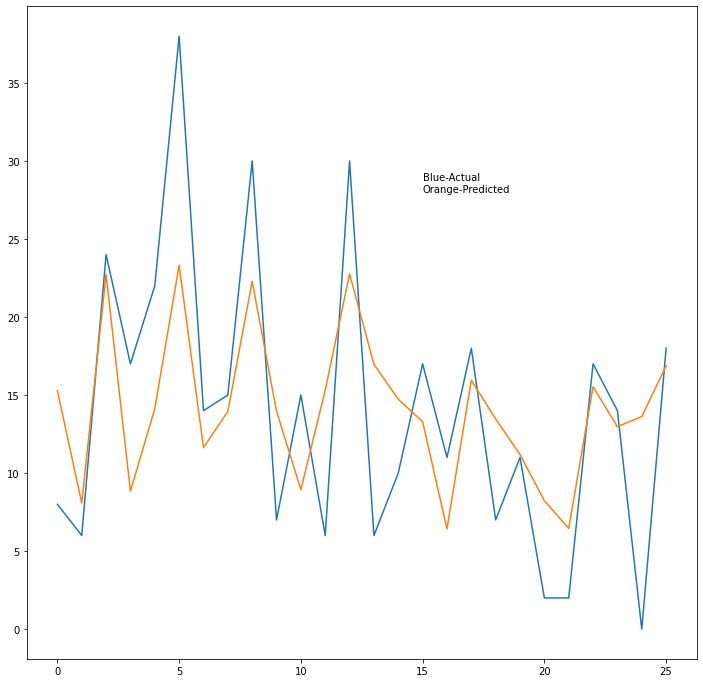

In [63]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,12))
graph4=comparison4[['Actual','Predicted']]
plt.text(15,28,'Blue-Actual \nOrange-Predicted')
plt.plot(graph4)
plt.show

In [64]:
Columns={'Parameters':['Elastic Modulus (GPA)','Ultimate Tensile(MPA)','Yield strength(MPA) (Max)','Elongation(%)'],
        'SVRerror':[rmse1,rmse2,rmse3,rmse4]}
Error=pd.DataFrame(Columns)
Error.to_excel('errors.xlsx')

In [65]:
Error

Parameters    SVRerror
0      Elastic Modulus (GPA)    9.832581
1      Ultimate Tensile(MPA)  226.345249
2  Yield strength(MPA) (Max)  198.874493
3              Elongation(%)    6.697488